In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Cleaning dataset TravelData

In [2]:
df1=pd.read_csv("C:\\Users\\LILLY GRACE\\Downloads\\Data Purchase Journey Travel\\TravelData.csv")

In [3]:
df1.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17


In [4]:
df1.shape

(2456414, 10)

In [5]:
df1.isnull().sum()/df1.shape[0]

UserID          0.000000
PurchaseID      0.000000
TIMESPSS        0.000000
Duration        0.057427
DEVICE_TYPE     0.000000
type_touch      0.000000
purchase_own    0.000000
purchase_any    0.000000
MobilePanel     0.000000
FixedPanel      0.000000
dtype: float64

In [6]:
df1['Duration'].fillna(0,inplace=True)

In [7]:
df1.dtypes

UserID            int64
PurchaseID        int64
TIMESPSS         object
Duration        float64
DEVICE_TYPE      object
type_touch        int64
purchase_own      int64
purchase_any      int64
MobilePanel       int64
FixedPanel        int64
dtype: object

In [8]:
df1['TIMESPSS']=pd.to_datetime(df1['TIMESPSS'])

In [9]:
y=['UserID','PurchaseID','type_touch']

In [10]:
for i in y:
    df1[i]=df1[i].astype(str)

In [11]:
d=df1[(df1['purchase_own']==1) & (df1['purchase_any']==1)]
d.shape

(81103, 10)

In [12]:
df1['purchase_own']=np.where(  ((df1['purchase_own']==0) & (df1['purchase_any']==1) ), 2, df1['purchase_own'])
df1['purchase_own'].value_counts()

0    1607065
2     768246
1      81103
Name: purchase_own, dtype: int64

0 - 0 -  [0]customer own touchpoint purchase has hapended \
1 - 1 -  [2] firm's touchpoint purchase has happened from where customer started journey \
0 - 1 -  [3] competitor firm's website purchase has happened

In [13]:
df1['purchase_status']=df1['purchase_own']+df1['purchase_any']
df1['purchase_status'].value_counts(normalize=True)

0    0.654232
3    0.312751
2    0.033017
Name: purchase_status, dtype: float64

In [14]:
#combined 3 and 2 becoz 2 category is too less

In [15]:
df1['purchase_status']=np.where(  ((df1['purchase_status']==3) | (df1['purchase_status']==2)) ,1,df1['purchase_status'])

In [16]:
df1['purchase_status'].value_counts(normalize=True)

0    0.654232
1    0.345768
Name: purchase_status, dtype: float64

In [17]:
df1['FixedPanel'].value_counts(normalize=True)

17    0.451880
16    0.105131
0     0.090458
12    0.068587
15    0.043516
14    0.035779
13    0.034609
11    0.031750
9     0.027127
10    0.023371
8     0.019596
7     0.011928
5     0.011241
6     0.011072
4     0.009529
3     0.009293
2     0.007991
1     0.007140
Name: FixedPanel, dtype: float64

In [18]:
df1['MobilePanel'].value_counts(normalize=True)

0     0.650906
17    0.200884
16    0.049194
15    0.011040
11    0.010405
9     0.009545
1     0.009283
12    0.007971
14    0.007941
10    0.007871
4     0.007007
13    0.005064
8     0.004998
6     0.004774
2     0.004264
7     0.003724
3     0.002767
5     0.002363
Name: MobilePanel, dtype: float64

In [19]:
df1['MobilePanel']=np.where(  ((df1['MobilePanel']>=0) & (df1['MobilePanel']<11)) ,18,df1['MobilePanel'])
df1['MobilePanel']=np.where(  ((df1['MobilePanel']>=12) & (df1['MobilePanel']<15)) ,19,df1['MobilePanel'])
df1['MobilePanel']=np.where(  ((df1['MobilePanel']==11) & (df1['MobilePanel']==15) &(df1['MobilePanel']==16) ) ,20,df1['MobilePanel'])

In [20]:
df1['MobilePanel'].value_counts()

18    1737916
17     493454
16     120841
19      51525
15      27119
11      25559
Name: MobilePanel, dtype: int64

In [21]:
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=1) & (df1['FixedPanel']<5)) ,0,df1['FixedPanel'])
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=5) & (df1['FixedPanel']<8)) ,1,df1['FixedPanel'])
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=8) & (df1['FixedPanel']<11)) ,2,df1['FixedPanel'])
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=11) & (df1['FixedPanel']<17)) ,3,df1['FixedPanel'])

In [22]:
df1['FixedPanel'].value_counts()

17    1110004
3      784511
0      305606
2      172183
1       84110
Name: FixedPanel, dtype: int64

In [23]:
df1['FixedPanel']=df1['FixedPanel'].astype(str)
df1['MobilePanel']=df1['MobilePanel'].astype(str)

(array([1737916.,       0.,  493454.,       0.,  120841.,       0.,
          51525.,       0.,   27119.,   25559.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

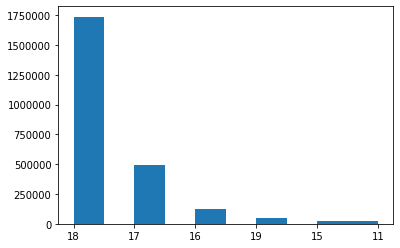

In [24]:
plt.hist(df1['MobilePanel'])

In [25]:
df1.shape

(2456414, 11)

In [26]:
df1.drop(['purchase_own','purchase_any'],axis=1,inplace=True)

In [27]:
df1.shape

(2456414, 9)

In [28]:
df1.dtypes

UserID                     object
PurchaseID                 object
TIMESPSS           datetime64[ns]
Duration                  float64
DEVICE_TYPE                object
type_touch                 object
MobilePanel                object
FixedPanel                 object
purchase_status             int64
dtype: object

In [29]:
df0=df1.drop_duplicates(subset='PurchaseID',keep='last').reset_index().drop("index",axis=1)

In [30]:
df0.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,MobilePanel,FixedPanel,purchase_status
0,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,18,0,0
1,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,18,0,0
2,1,3,2015-08-07 19:16:59,120.000,FIXED,7,18,17,0
3,1,4,2015-11-24 22:30:44,216.000,FIXED,1,18,17,0
4,1,5,2016-06-15 15:48:20,155.262,FIXED,7,18,17,0


# Cleaning dataset TravelDataDemos

In [31]:
df2=pd.read_csv("C:\\Users\\LILLY GRACE\\Downloads\\Data Purchase Journey Travel\\TravelDataDemos.csv",na_values=['nan'])

In [32]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)


In [33]:
df2.head()

,UserID,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,NaN,NaN,NaN,NaN,51.998762,NaN,NaN,NaN,NaN,NaN,NaN
1,9657,NaN,NaN,NaN,NaN,51.998762,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5.0,6.0,1.0,1.0,59.000000,2.0,2.0,0.0,5.0,2.0,2.0
3,2,3.0,3.0,2.0,2.0,47.000000,2.0,7.0,0.0,2.0,6.0,4.0
4,3,NaN,NaN,NaN,NaN,51.998762,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df2['GenderID'].unique()

array([nan,  1.,  2.])

In [35]:
df2.isnull().sum()/df2.shape[0]

UserID                           0.000000
SPSS_Regio5                      0.165633
RESP_GEM_GROOTTE                 0.165633
BAS_huishoudgrootte              0.165633
GenderID                         0.165633
Age                              0.000000
BAS_werkzaamheid_resp            0.165633
BAS_bruto_jaarinkomen            0.165633
afg_kinderen_huishouden          0.165633
AFG_sk2015                       0.165633
BAS_voltooide_opleiding8_resp    0.209857
SPSS_Lifestage                   0.165633
dtype: float64

In [36]:
df2.dtypes

UserID                             int64
SPSS_Regio5                      float64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                         float64
Age                              float64
BAS_werkzaamheid_resp            float64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp    float64
SPSS_Lifestage                   float64
dtype: object

In [37]:
# !pip install missingno

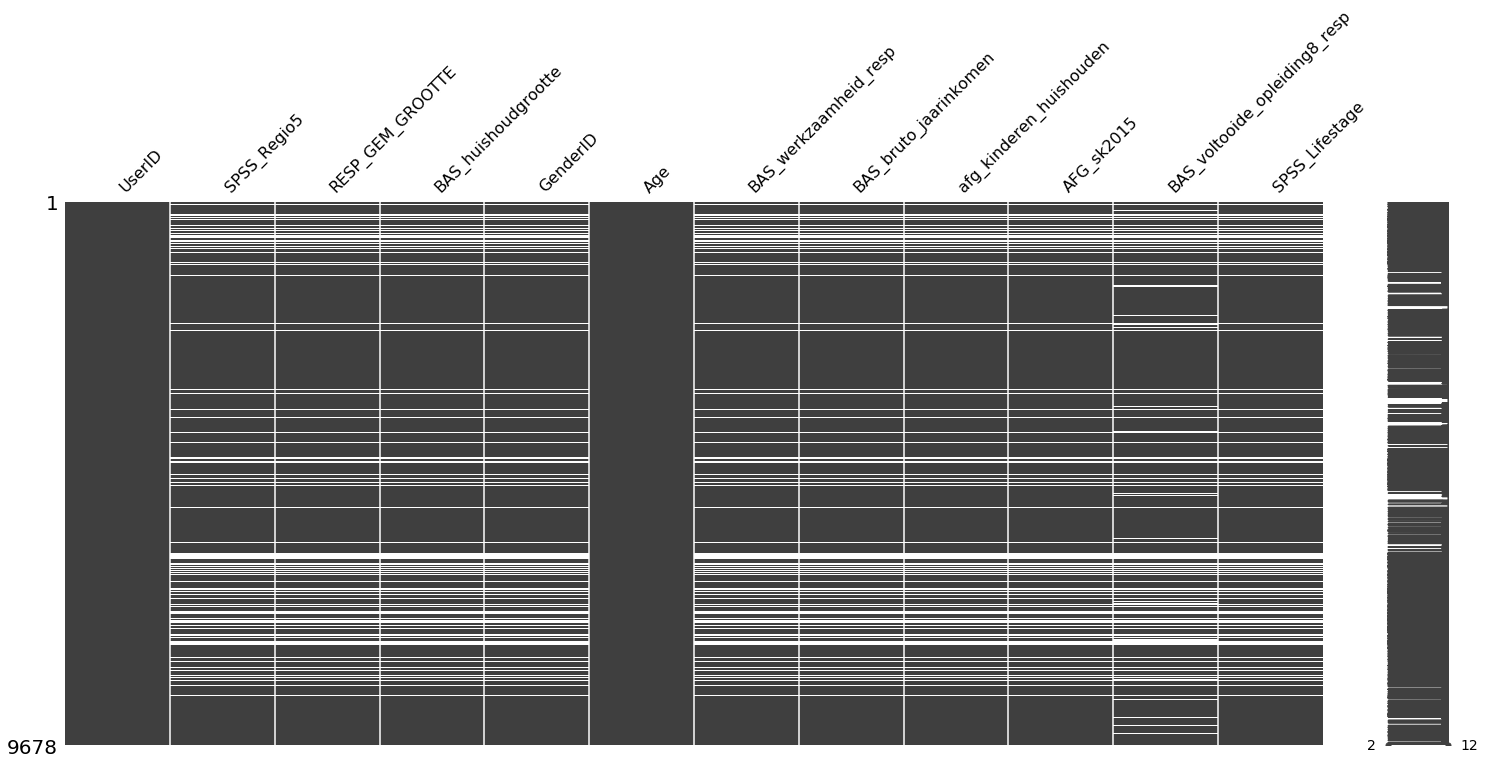

In [38]:
import missingno as msno  
msno.matrix(df2) 

In [39]:
df2.dtypes

UserID                             int64
SPSS_Regio5                      float64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                         float64
Age                              float64
BAS_werkzaamheid_resp            float64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp    float64
SPSS_Lifestage                   float64
dtype: object

In [40]:
df2['GenderID']=np.where( df2['GenderID']==1, 0, 1)

In [41]:
df2.dtypes

UserID                             int64
SPSS_Regio5                      float64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                           int32
Age                              float64
BAS_werkzaamheid_resp            float64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp    float64
SPSS_Lifestage                   float64
dtype: object

In [42]:
for c in list(df2.select_dtypes(include=['O']).columns):
    df2[c].fillna(df2[c].value_counts().index[0],inplace=True)  

In [43]:
for c in list(df2.select_dtypes(exclude=['O']).columns):
    df2[c].fillna(df2[c].mean(),inplace=True)

In [44]:
df2.isnull().sum()/df2.shape[0]

UserID                           0.0
SPSS_Regio5                      0.0
RESP_GEM_GROOTTE                 0.0
BAS_huishoudgrootte              0.0
GenderID                         0.0
Age                              0.0
BAS_werkzaamheid_resp            0.0
BAS_bruto_jaarinkomen            0.0
afg_kinderen_huishouden          0.0
AFG_sk2015                       0.0
BAS_voltooide_opleiding8_resp    0.0
SPSS_Lifestage                   0.0
dtype: float64

In [45]:
df2.shape

(9678, 12)

In [46]:
df2.dtypes

UserID                             int64
SPSS_Regio5                      float64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                           int32
Age                              float64
BAS_werkzaamheid_resp            float64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp    float64
SPSS_Lifestage                   float64
dtype: object

In [47]:
x=['SPSS_Regio5','BAS_werkzaamheid_resp','BAS_voltooide_opleiding8_resp','SPSS_Lifestage']

In [48]:
for i in x:
    df2[i]=df2[i].astype(np.int64)

In [49]:
df2.dtypes

UserID                             int64
SPSS_Regio5                        int64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                           int32
Age                              float64
BAS_werkzaamheid_resp              int64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp      int64
SPSS_Lifestage                     int64
dtype: object

In [50]:
df2.head()

,UserID,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4
1,9657,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4
2,1,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2
3,2,3,3.000000,2.000000,1,47.000000,2,7.00000,0.000000,2.000000,6,4
4,3,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4


In [51]:
x=['UserID','SPSS_Regio5','BAS_werkzaamheid_resp','BAS_voltooide_opleiding8_resp','SPSS_Lifestage']

In [52]:
for i in x:
    df2[i]=df2[i].astype(str)

In [53]:
df2.dtypes

UserID                            object
SPSS_Regio5                       object
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                           int32
Age                              float64
BAS_werkzaamheid_resp             object
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp     object
SPSS_Lifestage                    object
dtype: object

In [54]:
df2.shape

(9678, 12)

# Final Dataset

In [55]:
df3=pd.merge(df0,df2,on='UserID',how='left')

In [56]:
df3.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,MobilePanel,FixedPanel,purchase_status,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,18,0,0,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4
1,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,18,0,0,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4
2,1,3,2015-08-07 19:16:59,120.000,FIXED,7,18,17,0,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2
3,1,4,2015-11-24 22:30:44,216.000,FIXED,1,18,17,0,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2
4,1,5,2016-06-15 15:48:20,155.262,FIXED,7,18,17,0,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2


In [57]:
df3.shape

(29012, 20)

In [58]:
df3.isnull().sum()

UserID                           0
PurchaseID                       0
TIMESPSS                         0
Duration                         0
DEVICE_TYPE                      0
type_touch                       0
MobilePanel                      0
FixedPanel                       0
purchase_status                  0
SPSS_Regio5                      0
RESP_GEM_GROOTTE                 0
BAS_huishoudgrootte              0
GenderID                         0
Age                              0
BAS_werkzaamheid_resp            0
BAS_bruto_jaarinkomen            0
afg_kinderen_huishouden          0
AFG_sk2015                       0
BAS_voltooide_opleiding8_resp    0
SPSS_Lifestage                   0
dtype: int64

In [59]:
df3.dtypes

UserID                                   object
PurchaseID                               object
TIMESPSS                         datetime64[ns]
Duration                                float64
DEVICE_TYPE                              object
type_touch                               object
MobilePanel                              object
FixedPanel                               object
purchase_status                           int64
SPSS_Regio5                              object
RESP_GEM_GROOTTE                        float64
BAS_huishoudgrootte                     float64
GenderID                                  int32
Age                                     float64
BAS_werkzaamheid_resp                    object
BAS_bruto_jaarinkomen                   float64
afg_kinderen_huishouden                 float64
AFG_sk2015                              float64
BAS_voltooide_opleiding8_resp            object
SPSS_Lifestage                           object
dtype: object

In [60]:
df3=df3.dropna(axis=0)

In [61]:
df3.isnull().sum()

UserID                           0
PurchaseID                       0
TIMESPSS                         0
Duration                         0
DEVICE_TYPE                      0
type_touch                       0
MobilePanel                      0
FixedPanel                       0
purchase_status                  0
SPSS_Regio5                      0
RESP_GEM_GROOTTE                 0
BAS_huishoudgrootte              0
GenderID                         0
Age                              0
BAS_werkzaamheid_resp            0
BAS_bruto_jaarinkomen            0
afg_kinderen_huishouden          0
AFG_sk2015                       0
BAS_voltooide_opleiding8_resp    0
SPSS_Lifestage                   0
dtype: int64

In [62]:
#apply models in this dataset df3
df3.shape

(29012, 20)

In [63]:
df3.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,MobilePanel,FixedPanel,purchase_status,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,18,0,0,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4
1,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,18,0,0,3,4.893498,2.514675,1,51.998762,4,4.49226,0.482229,2.853003,4,4
2,1,3,2015-08-07 19:16:59,120.000,FIXED,7,18,17,0,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2
3,1,4,2015-11-24 22:30:44,216.000,FIXED,1,18,17,0,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2
4,1,5,2016-06-15 15:48:20,155.262,FIXED,7,18,17,0,5,6.000000,1.000000,0,59.000000,2,2.00000,0.000000,5.000000,2,2


In [64]:
df3.dtypes

UserID                                   object
PurchaseID                               object
TIMESPSS                         datetime64[ns]
Duration                                float64
DEVICE_TYPE                              object
type_touch                               object
MobilePanel                              object
FixedPanel                               object
purchase_status                           int64
SPSS_Regio5                              object
RESP_GEM_GROOTTE                        float64
BAS_huishoudgrootte                     float64
GenderID                                  int32
Age                                     float64
BAS_werkzaamheid_resp                    object
BAS_bruto_jaarinkomen                   float64
afg_kinderen_huishouden                 float64
AFG_sk2015                              float64
BAS_voltooide_opleiding8_resp            object
SPSS_Lifestage                           object
dtype: object

In [65]:
df3['month']=pd.to_datetime(df3['TIMESPSS'],format="%Y%m%d").dt.month
df3['year']=pd.to_datetime(df3['TIMESPSS'],format="%Y%m%d").dt.year
df3['year_month']=df3['year']+df3['month']
df3['year_month']=df3['year'].astype(str)+"_"+df3['month'].astype(str)

In [66]:
df3['BAS_voltooide_opleiding8_resp']=np.where(df3['BAS_voltooide_opleiding8_resp']=='nan','97',df3['BAS_voltooide_opleiding8_resp'])

In [67]:
df4=df3.drop(['UserID','PurchaseID','TIMESPSS','month','year'],axis=1)

In [68]:
df4.drop(['type_touch','BAS_voltooide_opleiding8_resp','year_month','DEVICE_TYPE'],axis=1,inplace=True)

In [69]:
df4.drop(['afg_kinderen_huishouden','RESP_GEM_GROOTTE','Age'],axis=1,inplace=True)

In [70]:
df4['purchase_status'].value_counts()

0    25338
1     3674
Name: purchase_status, dtype: int64

In [71]:
df4.head()

,Duration,MobilePanel,FixedPanel,purchase_status,SPSS_Regio5,BAS_huishoudgrootte,GenderID,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,AFG_sk2015,SPSS_Lifestage
0,6.492,18,0,0,3,2.514675,1,4,4.49226,2.853003,4
1,57.000,18,0,0,3,2.514675,1,4,4.49226,2.853003,4
2,120.000,18,17,0,5,1.000000,0,2,2.00000,5.000000,2
3,216.000,18,17,0,5,1.000000,0,2,2.00000,5.000000,2
4,155.262,18,17,0,5,1.000000,0,2,2.00000,5.000000,2


In [72]:
df4=pd.get_dummies(df4)

In [73]:
df4.shape

(29012, 42)

In [74]:
df4.columns

Index(['Duration', 'purchase_status', 'BAS_huishoudgrootte', 'GenderID',
       'BAS_bruto_jaarinkomen', 'AFG_sk2015', 'MobilePanel_11',
       'MobilePanel_15', 'MobilePanel_16', 'MobilePanel_17', 'MobilePanel_18',
       'MobilePanel_19', 'FixedPanel_0', 'FixedPanel_1', 'FixedPanel_17',
       'FixedPanel_2', 'FixedPanel_3', 'SPSS_Regio5_1', 'SPSS_Regio5_2',
       'SPSS_Regio5_3', 'SPSS_Regio5_4', 'SPSS_Regio5_5',
       'BAS_werkzaamheid_resp_1', 'BAS_werkzaamheid_resp_2',
       'BAS_werkzaamheid_resp_3', 'BAS_werkzaamheid_resp_4',
       'BAS_werkzaamheid_resp_5', 'BAS_werkzaamheid_resp_6',
       'BAS_werkzaamheid_resp_7', 'BAS_werkzaamheid_resp_8',
       'BAS_werkzaamheid_resp_9', 'BAS_werkzaamheid_resp_97',
       'SPSS_Lifestage_1', 'SPSS_Lifestage_2', 'SPSS_Lifestage_3',
       'SPSS_Lifestage_4', 'SPSS_Lifestage_5', 'SPSS_Lifestage_6',
       'SPSS_Lifestage_7', 'SPSS_Lifestage_8', 'SPSS_Lifestage_9',
       'SPSS_Lifestage_97'],
      dtype='object')

# Decision Tree

In [75]:
X=df4.drop('purchase_status',axis=1)
y=df4['purchase_status']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23209, 41)
(5803, 41)
(23209,)
(5803,)


In [78]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [79]:
#Average number of correct predictions, same as confusion matrix
clf.score(X_test,y_test)

0.8705841805962433

In [80]:
#Predicted probabilities
prob=clf.predict_proba(X_test)
prob

array([[0.86206897, 0.13793103],
       [0.86206897, 0.13793103],
       [0.86035591, 0.13964409],
       ...,
       [0.9274062 , 0.0725938 ],
       [0.79874652, 0.20125348],
       [0.86035591, 0.13964409]])

In [81]:
#Area Under the curve
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,prob[:,1])

0.5907867103561047

In [82]:
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                       proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)

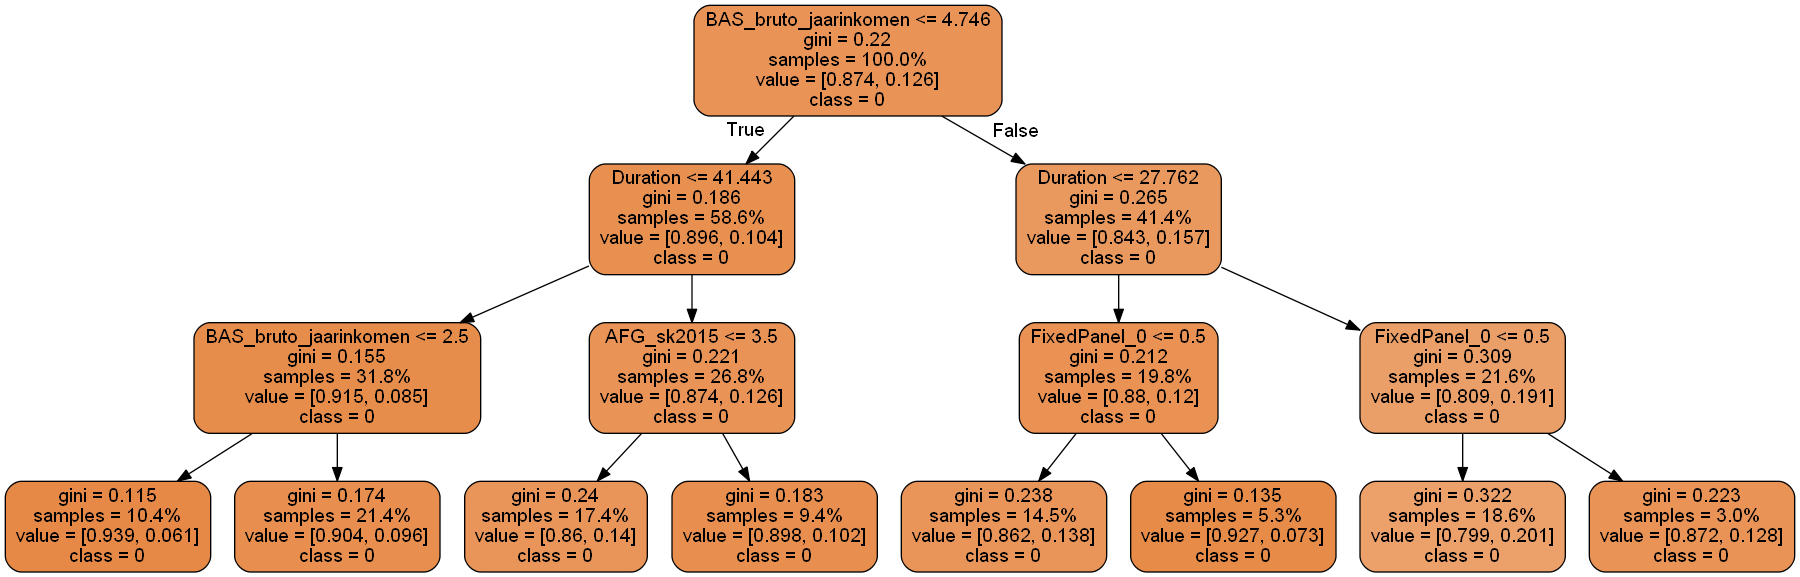

In [83]:
from IPython.display import Image
Image(graph.create_png())

In [84]:
graph.write_jpeg("online_customer_journey_tree.jpeg")

True

In [85]:
#Grid search
import sklearn.model_selection as model_selection
model=model_selection.GridSearchCV(clf, param_grid={'max_depth':[3,4,5,7],'criterion':['gini','entropy']},cv=3)
model.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [86]:
model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [87]:
model.best_score_

0.8740574809477927

In [88]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [89]:
#import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.5907867103561047

In [90]:
#Feature importance
pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

BAS_bruto_jaarinkomen       0.401970
Duration                    0.395945
FixedPanel_0                0.157485
AFG_sk2015                  0.044600
MobilePanel_19              0.000000
SPSS_Regio5_2               0.000000
SPSS_Regio5_1               0.000000
FixedPanel_3                0.000000
FixedPanel_2                0.000000
FixedPanel_17               0.000000
FixedPanel_1                0.000000
MobilePanel_18              0.000000
SPSS_Regio5_4               0.000000
MobilePanel_17              0.000000
MobilePanel_16              0.000000
MobilePanel_15              0.000000
MobilePanel_11              0.000000
GenderID                    0.000000
BAS_huishoudgrootte         0.000000
SPSS_Regio5_3               0.000000
SPSS_Lifestage_97           0.000000
SPSS_Lifestage_9            0.000000
BAS_werkzaamheid_resp_1     0.000000
SPSS_Lifestage_8            0.000000
SPSS_Lifestage_7            0.000000
SPSS_Lifestage_6            0.000000
SPSS_Lifestage_5            0.000000
S

# Bagging

In [91]:
#Bagging Classifier: Bootstrap sampling with DT as base learner
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [93]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [94]:
clf.score(X_test,y_test)

0.8493882474582113

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [97]:
clf.score(X_test,y_test)

0.8421506117525418

In [98]:
#Area Under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.5587481405104621

# AdaBoost

In [99]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(n_estimators=50,random_state=400)
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=400)

In [100]:
clf.score(X_test,y_test)

0.8705841805962433

# Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [102]:
clf.score(X_test,y_test)

0.8705841805962433

# XgBoost

In [103]:
import xgboost as xg
clf=xg.XGBClassifier(objective='binary:logistic',reg_alpha=0.2,max_depth=4,random_state=2) #L1 regularization
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=2, reg_alpha=0.2,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [104]:
clf.score(X_test,y_test)

0.8704118559365845

In [105]:
#Area Under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test,clf.predict_proba(pd.get_dummies(X_test))[:,1])

0.6051676413501976

# Logistic

In [106]:
train=df4.sample(frac=0.80,random_state=1)
test=df4.drop(train.index)

In [107]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [108]:
glm1=smf.glm('purchase_status~Duration+BAS_huishoudgrootte+GenderID+BAS_bruto_jaarinkomen+AFG_sk2015+MobilePanel_11+MobilePanel_15+MobilePanel_16+MobilePanel_17+MobilePanel_18+MobilePanel_19+FixedPanel_0+FixedPanel_1+FixedPanel_17+FixedPanel_2+FixedPanel_3+SPSS_Regio5_1+SPSS_Regio5_2+SPSS_Regio5_3+SPSS_Regio5_4+SPSS_Regio5_5+BAS_werkzaamheid_resp_1+BAS_werkzaamheid_resp_2+BAS_werkzaamheid_resp_3+BAS_werkzaamheid_resp_4+BAS_werkzaamheid_resp_5+BAS_werkzaamheid_resp_6+BAS_werkzaamheid_resp_7+BAS_werkzaamheid_resp_8+BAS_werkzaamheid_resp_9+BAS_werkzaamheid_resp_97+SPSS_Lifestage_1+SPSS_Lifestage_2+SPSS_Lifestage_3+SPSS_Lifestage_4+SPSS_Lifestage_5+SPSS_Lifestage_6+SPSS_Lifestage_7+SPSS_Lifestage_8+SPSS_Lifestage_9+SPSS_Lifestage_97',data=train,family=sm.families.Binomial()).fit()
print(glm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        purchase_status   No. Observations:                23210
Model:                            GLM   Df Residuals:                    23173
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 23 Jun 2020   Deviance:                          nan
Time:                        11:14:15   Pearson chi2:                 3.09e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [109]:
test['prob']=glm1.predict(test)
test['prob'].head()

14    0.0
15    0.0
18    0.0
20    0.0
27    0.0
Name: prob, dtype: float64

In [110]:
# AUC
from sklearn import metrics
metrics.roc_auc_score(test['purchase_status'],test['prob'])

0.47525118140631895

In [111]:
# df3.to_csv(r'df3.csv')

In [112]:
glm2=smf.glm('purchase_status~Duration+BAS_huishoudgrootte+GenderID+BAS_bruto_jaarinkomen+AFG_sk2015+MobilePanel_11+MobilePanel_15+MobilePanel_16+MobilePanel_18+MobilePanel_19+FixedPanel_0+FixedPanel_1+FixedPanel_17+FixedPanel_2+FixedPanel_3+SPSS_Regio5_1+SPSS_Regio5_2+SPSS_Regio5_3+SPSS_Regio5_4+SPSS_Regio5_5+BAS_werkzaamheid_resp_1+BAS_werkzaamheid_resp_3+BAS_werkzaamheid_resp_4+BAS_werkzaamheid_resp_5+BAS_werkzaamheid_resp_6+BAS_werkzaamheid_resp_7+BAS_werkzaamheid_resp_8+BAS_werkzaamheid_resp_9+BAS_werkzaamheid_resp_97+SPSS_Lifestage_1+SPSS_Lifestage_2+SPSS_Lifestage_3+SPSS_Lifestage_4+SPSS_Lifestage_5+SPSS_Lifestage_7+SPSS_Lifestage_8+SPSS_Lifestage_9+SPSS_Lifestage_97',data=train,family=sm.families.Binomial()).fit()
print(glm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        purchase_status   No. Observations:                23210
Model:                            GLM   Df Residuals:                    23173
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8568.8
Date:                Tue, 23 Jun 2020   Deviance:                       17138.
Time:                        11:14:17   Pearson chi2:                 2.32e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [113]:
glm3=smf.glm('purchase_status~Duration+BAS_bruto_jaarinkomen+AFG_sk2015+MobilePanel_11+MobilePanel_16+MobilePanel_18+FixedPanel_0+FixedPanel_1+FixedPanel_2+FixedPanel_3+SPSS_Regio5_1+SPSS_Regio5_2+SPSS_Regio5_3+SPSS_Regio5_4+SPSS_Regio5_5+BAS_werkzaamheid_resp_1+BAS_werkzaamheid_resp_4+BAS_werkzaamheid_resp_6+BAS_werkzaamheid_resp_7+BAS_werkzaamheid_resp_8+BAS_werkzaamheid_resp_9+SPSS_Lifestage_7+SPSS_Lifestage_8+SPSS_Lifestage_9',data=train,family=sm.families.Binomial()).fit()
print(glm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        purchase_status   No. Observations:                23210
Model:                            GLM   Df Residuals:                    23186
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8597.5
Date:                Tue, 23 Jun 2020   Deviance:                       17195.
Time:                        11:14:18   Pearson chi2:                 2.32e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [114]:
test['prob']=glm3.predict(test)
test['prob'].head()

14    0.141549
15    0.133732
18    0.134131
20    0.133825
27    0.127918
Name: prob, dtype: float64

In [115]:
# AUC
from sklearn import metrics
metrics.roc_auc_score(test['purchase_status'],test['prob'])

0.6088165097821292

In [116]:
glm4=smf.glm('purchase_status~Duration+BAS_bruto_jaarinkomen+AFG_sk2015+MobilePanel_11+MobilePanel_16+MobilePanel_18+FixedPanel_0+FixedPanel_1+FixedPanel_2+FixedPanel_3+BAS_werkzaamheid_resp_1+BAS_werkzaamheid_resp_4+BAS_werkzaamheid_resp_6+BAS_werkzaamheid_resp_7+BAS_werkzaamheid_resp_8+BAS_werkzaamheid_resp_9+SPSS_Lifestage_7+SPSS_Lifestage_8+SPSS_Lifestage_9',data=train,family=sm.families.Binomial()).fit()
print(glm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        purchase_status   No. Observations:                23210
Model:                            GLM   Df Residuals:                    23190
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8601.3
Date:                Tue, 23 Jun 2020   Deviance:                       17203.
Time:                        11:14:19   Pearson chi2:                 2.32e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [117]:
test['prob']=glm4.predict(test)
test['prob'].head()

14    0.143780
15    0.135865
18    0.136270
20    0.135960
27    0.129663
Name: prob, dtype: float64

In [118]:
# AUC
from sklearn import metrics
metrics.roc_auc_score(test['purchase_status'],test['prob'])

0.6095485256812705

In [119]:
#ROC
fpr,tpr,thresholds=metrics.roc_curve(test['purchase_status'],test['prob'])
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

Text(0.5, 1.0, 'ROC Curve')

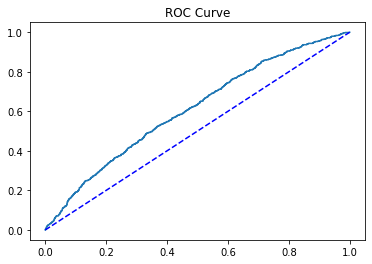

In [120]:
plt.plot(fpr,tpr)
plt.plot(x,y,'b--')
plt.title("ROC Curve")

In [121]:
#Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
idv = glm4.model.exog
vif = [variance_inflation_factor(idv, i) for i in range(idv.shape[1])]

pd.DataFrame({'Features':glm4.model.exog_names,'vif':vif})

,Features,vif
0,Intercept,23.117748
1,Duration,1.024509
2,BAS_bruto_jaarinkomen,1.151725
3,AFG_sk2015,1.308921
4,MobilePanel_11,1.040680
5,MobilePanel_16,1.179808
6,MobilePanel_18,1.359439
7,FixedPanel_0,1.329146
8,FixedPanel_1,1.073660
9,FixedPanel_2,1.103039
